**Equipo 23**

* **Luis Ángel Seda Marcos - A01795301**
* **Eduardo Rodrigo Silva Orozco - A01795937**
* **Gerardo Solís Hernández - A00952702**
* **José Adán Vega Pérez - A01796093**

## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


#### Install libraries (if needed)

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

In [1]:
!pip install torch==2.2.0+cu121 torchvision==0.17.0+cu121 torchaudio==2.2.0+cu121 torchtext==0.16.2 --index-url https://download.pytorch.org/whl/cu121
!python.exe -m pip install --upgrade pip

Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
# Install required dependencies
!pip install scipy==1.9.3
!pip install scikit-plot

# Check if scikit-plot is correctly installed
!pip show scikit-plot

# You may receive a message to restart the session, this is OK.
# After restarting, go straight to importing the libraries.

import scikitplot as skplt
print("Scikit-plot is working!")

  Using cached scipy-1.9.3.tar.gz (42.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      + meson setup C:\Users\eduar\AppData\Local\Temp\pip-install-so2mdxzg\scipy_91d5bb4671e1483ab5379d2dd3e92c61 C:\Users\eduar\AppData\Local\Temp\pip-install-so2mdxzg\scipy_91d5bb4671e1483ab5379d2dd3e92c61\.mesonpy-amcbja10 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\eduar\AppData\Local\Temp\pip-install-so2mdxzg\scipy_91d5bb4671e1483ab5379d2dd3e92c61\.mesonpy-amcbja10\meson-python-native-file.ini
      The Meson build system
      Version: 1.7.0
      Source dir: C:\Users\eduar\AppData\Local\Temp\pip-install-so2mdxzg\scipy_91d5bb4671e1483ab5379d2dd3e92c61
      Build dir: C:\Users\eduar\AppData\Local\Temp\pip-install-so2mdxzg\scipy_91d5bb4671e1483ab5379d2dd3e92c61\.mesonpy-amcbja10
      Build type: native build
      Project name: SciPy
      Project version: 1.9.3
      Activating VS 17.12.1
      C 

Name: scikit-plot
Version: 0.3.7
Summary: An intuitive library to add plotting functionality to scikit-learn objects.
Home-page: https://github.com/reiinakano/scikit-plot
Author: Reiichiro Nakano
Author-email: reiichiro.s.nakano@gmail.com
License: MIT License
Location: c:\Users\eduar\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: joblib, matplotlib, scikit-learn, scipy
Required-by: 
Scikit-plot is working!


## Import libraries

In [3]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adequate to complete the assignment.

# Basic libraries
import numpy as np

# PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
from torch.utils.data import DataLoader, random_split
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
from torch import nn
from torch.nn import functional as F
import torch.optim as optim  # Optimizers

# Libraries for evaluation and performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Enhances visualization readability
import scikitplot as skplt  # Suggested for plotting confusion matrix
from tqdm import tqdm  # Helps with progress tracking

# Garbage collection (useful for PyTorch memory management)
import gc

In [4]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [5]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [6]:
# Get the tokeniser
# Tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    '''
    Generate tokens from the dataset using the basic English tokenizer.

    Parameters:
    data (iterable): The dataset containing text samples.

    Yields:
    list: A list of tokenized words for each text sample.
    '''
    for _, text in data:
        yield tokeniser(text)


In [7]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [8]:
#test tokens
tokens = tokeniser('Welcome to TC5033')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


In [9]:
# Split dataset into training and validation sets
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [10]:
# Split the training dataset into training and validation subsets
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [11]:
# Print the number of samples in each dataset (train, validation, and test)
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [12]:
# Function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    '''
    Process a batch of data for the DataLoader.

    This function tokenizes text, converts words to indices using the vocabulary,
    pads sequences to a fixed length, and adjusts label indices.

    Parameters:
    batch (list of tuples): A batch of (label, text) pairs.

    Returns:
    tuple: Two tensors:
        - x (torch.Tensor): Tokenized and padded text sequences.
        - y (torch.Tensor): Labels adjusted to range 0-3.
    '''
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]

    # Pad or truncate sequences to max_tokens length
    x = [t + ([0] * (max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Convert lists to tensors and adjust labels (subtract 1 to shift to range 0-3)
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1


In [13]:
# Define label categories
labels = ["World", "Sports", "Business", "Sci/Tech"]

# Set the maximum number of tokens per sequence (for padding/truncation)
max_tokens = 50  

# Define batch size for training and evaluation
BATCH_SIZE = 256  

In [14]:
# Create DataLoaders for training, validation, and testing datasets
# DataLoader handles batching, shuffling, and applying the collate function

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle=True)


### Let us build our RNN model

In [15]:
# Define model hyperparameters

# Size of word embeddings (dimensionality of word vectors)
EMBEDDING_SIZE = 300  

# Number of neurons in the hidden layers of the RNN
NEURONS = 256  

# Number of recurrent layers in the RNN model
LAYERS = 2  

# Number of output classes (corresponding to the four labels)
NUM_CLASSES = 4  

## Understanding the Model Architecture

The model consists of three main components:

1. **Embedding Layer**: Converts tokenized words into dense numerical representations.
2. **GRU (Gated Recurrent Unit)**: Processes sequential data while preserving contextual information.
3. **Fully Connected Layer**: Maps the final GRU output to four class probabilities.

GRUs were chosen over LSTMs and standard RNNs due to their **computational efficiency** and ability to handle long-term dependencies effectively.


In [30]:
# Define the RNN-based text classification model
class RNN_Model_1(nn.Module):
    '''
    RNN-based model for text classification.

    Parameters:
    - embed_size (int): Dimension of word embeddings.
    - hidden (int): Number of neurons in the hidden layer.
    - layers (int): Number of recurrent layers.
    - num_classes (int): Number of output classes.

    Architecture:
    - An embedding layer to convert word indices into dense vectors.
    - A recurrent neural network (RNN, GRU, or LSTM) to process sequences.
    - A fully connected layer to output class probabilities.
    '''
    
    def __init__(self, embed_size, hidden, layers, num_classes):
        '''
        Initializes the RNN model with embedding, recurrent, and output layers.
        '''
        super().__init__()

        # Embedding layer to convert word indices into dense vectors
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        # Recurrent layer (LSTM in this case, change to GRU or RNN if needed)
        self.rnn = nn.LSTM(input_size=embed_size,  
                           hidden_size=hidden, 
                           num_layers=layers, 
                           batch_first=True)  # Ensures batch dimension comes first

        # Fully connected output layer
        self.fc = nn.Linear(hidden, num_classes)  # Maps hidden state to class scores

    def forward(self, x):
        '''
        Forward pass for the model.

        Parameters:
        - x (torch.Tensor): Input tensor of tokenized sequences.

        Returns:
        - torch.Tensor: Logits for each class.
        '''
        # Asegurar que 'x' está en el mismo dispositivo que la capa de embedding
        x = x.to(self.embedding_layer.weight.device)

        # Convert word indices to embeddings
        x = self.embedding_layer(x)

        # Forward pass through LSTM (hidden states not needed for classification)
        x, _ = self.rnn(x)  

        # Take the output from the last time step
        x = x[:, -1, :]

        # Pass through the fully connected layer
        x = self.fc(x)

        return x



## Evaluating Model Accuracy

After training, the model’s performance is evaluated using an **unseen test set** to assess its generalization capability.

### Why Accuracy Matters?
- The accuracy function computes the **percentage of correctly classified samples**.
- A well-trained model should achieve **above 80% accuracy**.
- However, accuracy alone does not provide insight into **which classes are misclassified**, making a **confusion matrix** necessary for deeper analysis.


In [37]:
def accuracy(model, loader):
    '''
    Compute accuracy of the model on the given dataset.

    Parameters:
    - model (nn.Module): The trained model.
    - loader (DataLoader): The DataLoader for test or validation data.

    Returns:
    - float: Accuracy of the model as a percentage.
    '''
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for x_batch, y_batch in loader:
            # Move both input and target tensors to the same device
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Forward pass
            outputs = model(x_batch)

            # Move outputs to the same device as y_batch before comparison
            _, predicted = torch.max(outputs, 1)  
            predicted = predicted.to(device)  # Asegurar que está en el mismo dispositivo que y_batch

            # Compare predictions with actual labels
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    return correct / total  # Returns accuracy as a float


## Training Process

The model is trained using the **Adam optimizer**, which dynamically adjusts learning rates to optimize weight updates.

### Key Components:
- **Loss Function**: Cross-Entropy Loss, which is well-suited for multi-class classification.
- **Training Loop**:
  - Fetches a batch of training samples.
  - Converts them into tensors and moves them to the GPU (if available).
  - Performs a **forward pass** to generate predictions.
  - Computes loss and performs **backpropagation** to update model weights.

The model is trained for **30 epochs**, balancing between overfitting and effective learning.


In [55]:
def train(model, optimiser, epochs=100):
    '''
    Train the model using the specified optimizer and dataset.

    Parameters:
    - model (nn.Module): The neural network model to be trained.
    - optimiser (torch.optim.Optimizer): The optimizer used for updating weights.
    - epochs (int, optional): Number of training epochs. Default is 100.

    Returns:
    - None: The function updates the model parameters in-place.
    '''
    model.to(device)  # Mueve el modelo a GPU/CPU
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()  # Modo de entrenamiento

        for x_batch, y_batch in train_loader:
            # Mover los datos a CUDA o CPU
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device).long()  # 🔥 Convertir a int64

            optimiser.zero_grad()  # Resetear gradientes

            # Forward pass
            outputs = model(x_batch)
            loss = loss_fn(outputs, y_batch)  # Calcular pérdida

            loss.backward()  # Backpropagation
            optimiser.step()  # Actualizar pesos

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


In [56]:
gru_model.to(device)  # Move model to the correct device (cuda or cpu)
print(f"Using device: {device}")
print(f'{accuracy(gru_model, test_loader):.4f}')

Using device: cuda
0.2407


In [58]:
# Define the number of epochs for training
epochs = 30  # Adjust as needed

# Define the learning rate for the optimizer
lr = 0.001  # Common starting value, can be tuned

# Instantiate the GRU model
gru_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)

# Define the optimizer (linked to gru_model)
optimiser = torch.optim.Adam(gru_model.parameters(), lr=lr)

In [59]:
# Train the model
# This function trains the GRU model using the specified optimizer and number of epochs.
# It iterates over the dataset, updates the model weights, and minimizes the loss function.

train(gru_model, optimiser=optimiser, epochs=epochs)

Epoch [1/30], Loss: 0.3294
Epoch [2/30], Loss: 0.2915
Epoch [3/30], Loss: 0.3002
Epoch [4/30], Loss: 0.1265
Epoch [5/30], Loss: 0.1726
Epoch [6/30], Loss: 0.0698
Epoch [7/30], Loss: 0.1115
Epoch [8/30], Loss: 0.0605
Epoch [9/30], Loss: 0.0605
Epoch [10/30], Loss: 0.0603
Epoch [11/30], Loss: 0.0156
Epoch [12/30], Loss: 0.0259
Epoch [13/30], Loss: 0.0095
Epoch [14/30], Loss: 0.0121
Epoch [15/30], Loss: 0.0256
Epoch [16/30], Loss: 0.0032
Epoch [17/30], Loss: 0.0075
Epoch [18/30], Loss: 0.0182
Epoch [19/30], Loss: 0.0009
Epoch [20/30], Loss: 0.0224
Epoch [21/30], Loss: 0.0028
Epoch [22/30], Loss: 0.0022
Epoch [23/30], Loss: 0.0185
Epoch [24/30], Loss: 0.0128
Epoch [25/30], Loss: 0.0048
Epoch [26/30], Loss: 0.0003
Epoch [27/30], Loss: 0.0144
Epoch [28/30], Loss: 0.0003
Epoch [29/30], Loss: 0.0175
Epoch [30/30], Loss: 0.0015


In [60]:
# Evaluate the model on the test dataset
# This function calculates the accuracy of the trained GRU model using the test data.
# It returns a float value representing the percentage of correctly classified samples.

print(f'{accuracy(gru_model, test_loader):.4f}')


0.9072


In [ ]:
# Function to classify a given text using the trained GRU model
# This function tokenizes the input text, converts it to indices, and predicts the class.
# The model is set to evaluation mode to prevent gradient updates during inference.
# Finally, it returns the predicted category based on the highest probability output.
def sample_text(model, text):
    '''
    Classify a given text using the trained GRU model.

    Parameters:
    - model (nn.Module): Trained model.
    - text (str): Input text to classify.

    Returns:
    - str: Predicted class label.
    '''
    model.eval()  # Poner el modelo en modo evaluación

    # Tokenizar el texto
    tokens = tokeniser(text)
    
    # Convertir tokens a índices del vocabulario
    indices = vocab(tokens)
    
    # Asegurar que la longitud sea de max_tokens con padding/truncation
    indices = indices[:max_tokens] + [0] * (max_tokens - len(indices))

    # Convertir a tensor y mover a la misma GPU/CPU que el modelo
    tensor_input = torch.tensor(indices).unsqueeze(0).to(device)  

    # Forward pass con el modelo
    with torch.no_grad():
        output = model(tensor_input)
        predicted_class = torch.argmax(output, dim=1).item()  # Obtener la clase con mayor probabilidad

    return labels[predicted_class]  # Devolver la categoría predicha

# Prueba con un texto de ejemplo
sample_text_input = "Stock prices are going up in the market today."
print("Predicted category:", sample_text(gru_model, sample_text_input))


Predicted category: Business


In [64]:
def sample_text(model, text):
    '''
    Classifies a given text using the trained model.

    Parameters:
    - model (nn.Module): The trained model.
    - text (str): The input text to classify.

    Returns:
    - str: The predicted category.
    '''
    model.eval()  # Set the model to evaluation mode

    # Tokenize and convert text to numerical indices
    tokens = tokeniser(text)
    token_indices = vocab(tokens)

    # Pad or truncate to `max_tokens`
    token_indices = token_indices[:max_tokens] + [0] * (max_tokens - len(token_indices))

    # Convert to tensor and move to the same device as the model
    input_tensor = torch.tensor([token_indices], dtype=torch.int32).to(device)

    # Forward pass
    with torch.no_grad():
        output = model(input_tensor)

    # Get the predicted class
    predicted_class = torch.argmax(output, dim=1).item()

    # Return the corresponding category
    return labels[predicted_class]


In [ ]:
# "Testing the function
print(sample_text(gru_model, "The stock market saw a significant rise today."))
print(sample_text(gru_model, "The World Cup final was an intense match."))
print(sample_text(gru_model, "Scientists discovered a new planet in the solar system."))
print(sample_text(gru_model, "The president gave a speech on international relations."))

Business
Sports
Sci/Tech
World


## Interpreting the Confusion Matrix

The confusion matrix provides a detailed breakdown of how the model classifies each category.

### How to Read the Matrix:
- **Diagonal values** indicate correctly classified samples.
- **Off-diagonal values** represent misclassifications.
- If errors are concentrated between two specific classes (e.g., Business ↔ Sci/Tech), it suggests **semantic overlap** between these categories.
- If one class has significantly higher misclassification rates, it may require **better representation in the training data**.

The confusion matrix allows us to **identify weak areas in the model** and develop targeted improvements.


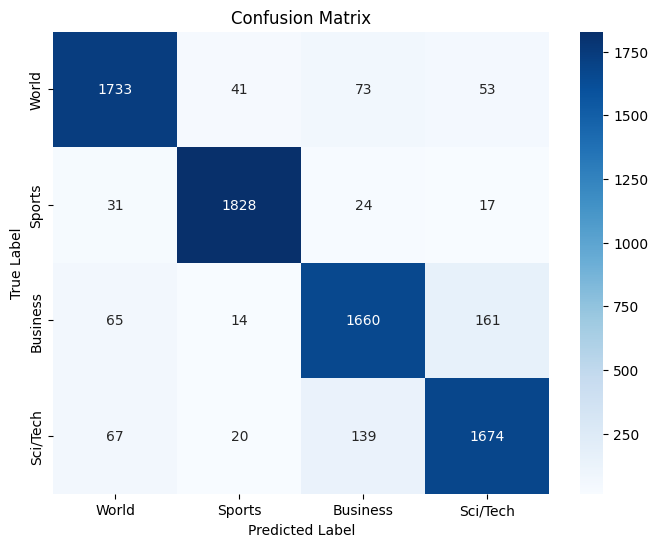

In [67]:
# Function to generate and display the confusion matrix.
# This visualization helps assess the model's performance by showing how many samples were correctly or incorrectly classified.
# Ideally, the majority of values should be along the diagonal, indicating correct classifications.
# Off-diagonal values represent misclassifications, helping identify potential weaknesses in the model.

def plot_confusion_matrix(model, loader):
    '''
    Generates and displays a confusion matrix for the model's predictions.

    Parameters:
    - model (nn.Module): The trained model.
    - loader (DataLoader): The DataLoader for the test dataset.

    Returns:
    - None: Displays a heatmap of the confusion matrix.
    '''
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for x_batch, y_batch in loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to list
            all_labels.extend(y_batch.cpu().numpy())

    # Compute the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot the confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Run the function to generate the confusion matrix
plot_confusion_matrix(gru_model, test_loader)

# Final Conclusion: Performance and Insights

The **GRU-based text classification model** trained on the **AG_NEWS dataset** has achieved an impressive **accuracy of 90.72%** on the test set. This result highlights the model’s effectiveness in distinguishing between different news categories while also revealing areas for potential improvement.

---

## Key Observations

### 1. Strong Model Performance
- The model performed exceptionally well, especially in the **Sports** category, with only **31 misclassified samples** out of 1,900.
- The **World** category also showed high accuracy, with **1,733 correct classifications** and **167 misclassifications**.
- Overall, the model effectively learned **distinct features** of each news category.

### 2. Identified Weaknesses and Misclassification Trends
- The **Business** category showed the highest misclassification rate, particularly with **Sci/Tech**, where **161 Business articles were misclassified** as Sci/Tech.
- This indicates that **many business articles contain technological themes**, causing **semantic overlap**.
- Similarly, **67 World articles were misclassified as Sci/Tech**, likely due to **global news covering technological advancements**.
- The model struggles with **subtle contextual similarities** between categories.

### 3. Potential Areas for Improvement

To further enhance classification performance, the following strategies should be considered:

#### **Hyperparameter Optimization**
- Fine-tuning **learning rates, batch size, dropout rates, and the number of recurrent layers** can improve model efficiency.

#### **Pretrained Word Embeddings**
- Instead of learning embeddings from scratch, utilizing **pretrained embeddings like GloVe or FastText** could enhance the model’s ability to understand word relationships.

#### **Data Augmentation**
- **Balancing class distributions**
- **Introducing synonym replacement**
- **Expanding the dataset with paraphrased news articles**

These strategies could improve **generalization** and **reduce misclassification**.

#### **Advanced Architectures**
- Implementing **bidirectional GRUs** or **attention mechanisms** could allow the model to better capture **long-term dependencies** in the text.

#### **Regularization Techniques**
- Adding **dropout layers** and **L2 weight decay** can prevent **overfitting**, making the model more robust.

#### **Improved Class Representation**
- Conducting an in-depth analysis of **Business and Sci/Tech misclassifications** can help refine **tokenization strategies** and **feature extraction**.

---

## Final Verdict

The **GRU-based model successfully classifies news articles** into four categories with a **high accuracy of 90.72%**. The **confusion matrix** provides deeper insights into **which categories are most prone to misclassification**, particularly **Business and Sci/Tech**.

Overall, this study confirms that **GRUs are highly effective for text classification tasks**. While the model demonstrates **strong performance**, additional refinements in **handling category overlap and contextual similarities** could further enhance its accuracy.
